## Tricky questions

In [ ]:
def foo():
    x = 1
    return x

foo.x = 4                  # создает атрибут x для объекта foo и присваивает ему значение 4

print(foo(), foo.x)

# Этот атрибут не имеет никакого отношения к локальной переменной x внутри функции

1 4


Атрибут функции `foo.x` позволяет вам прикрепить данные непосредственно к объекту `foo`, делая эти данные доступными на протяжении всего времени жизни программы, независимо от того, вызывается ли функция в данный момент. Это отличает его от локальной переменной x, которая создается и уничтожается при каждом вызове функции.


Наиболее распространенное и полезное применение атрибутов функции — это хранение кэша или мемоизации результатов.

In [ ]:
class Foo:
    def __init__(self):
        self.__execute()

    def execute(self):
        print(1)

    __execute = execute

class Bar(Foo):
    def execute(self):
        print(2)

Bar()

1


Это отличный пример, демонстрирующий, как Python обрабатывает **имена атрибутов с префиксом двумя подчеркиваниями** (Name Mangling) и как это влияет на **наследование** и **полиморфизм**.



1.  **Класс `Foo` (Родительский)**

      * **`def execute(self): print(1)`**: Определяет обычный публичный метод.
      * **`__execute = execute`**: Это ключевой момент. В Python, когда вы используете префикс `__` (два подчеркивания) для имени атрибута, компилятор переименовывает его, чтобы предотвратить случайное переопределение в подклассах.
          * Внутри `Foo` имя `__execute` фактически становится: `_Foo__execute`.
          * Это означает, что `_Foo__execute` теперь указывает на оригинальный метод `Foo.execute`, который печатает `1`.
      * **`def __init__(self): self.__execute()`**: Конструктор `Foo` вызывает переименованный метод `_Foo__execute`.

2.  **Класс `Bar` (Дочерний)**

      * **`def execute(self): print(2)`**: Класс `Bar` **переопределяет** публичный метод `execute`.

3.  **Создание экземпляра `Bar()`**

      * При создании `Bar()` вызывается его конструктор, но поскольку `Bar` не имеет своего `__init__`, вызывается конструктор родительского класса: `Foo.__init__(self)`.
      * `Foo.__init__` пытается вызвать `self.__execute()`.
      * Благодаря механизму *Name Mangling*, он ищет **исходное, переименованное имя** в объекте: `self._Foo__execute`.

4.  **Результат поиска**

      * `self._Foo__execute` **был привязан** в классе `Foo` и указывает на метод `Foo.execute`, который печатает `1`.
      * Несмотря на то, что `Bar` переопределил `execute`, это **не влияет** на скрытую привязку `_Foo__execute`, созданную в `Foo`.

Итог

Вызов `Bar()` выполняет: `Foo.__init__` $\to$ `self.__execute()` $\to$ `self._Foo__execute()` $\to$ **`Foo.execute()`**.

Результат выполнения

```
1
```
Главный Вывод: Эффект "Name Mangling"

  * Механизм Name Mangling (переименование имен) предназначен для предотвращения конфликтов атрибутов в подклассах.
  * Когда родительский класс `Foo` определяет атрибут `__execute`, он привязывается к **конкретному методу родителя** (`Foo.execute`) под скрытым именем `_Foo__execute`.
  * Когда подкласс `Bar` переопределяет метод `execute`, он **не** переопределяет скрытый атрибут `_Foo__execute` в родительском классе, поэтому вызов из конструктора `Foo` всегда приводит к запуску оригинальной версии `Foo.execute`.

In [ ]:
a = [1,'2', 3]
m = map(int, a)

print(sorted(m) == sorted(m))

# Функция sorted() (справа) пытается потребить исчерпанный итератор m.
# Поскольку m пуст, sorted() получает пустую последовательность. Результат: []
# Сравниваются результаты двух операций [1, 2, 3] == []

False


In [ ]:
a = {1,2,3}
b = a.add(4)  # Метод a.add(4) изменяет само множество a, добавляя в него элемент 4.
print(b)      # метод add() не возвращает само измененное множество и не возвращает никакого другого значения
# Он возвращает специальное значение None.

None


In [ ]:
a = set('abc')  # принимает итерируемый объект (строку 'abc') и создает из него множество
a.add('def')    # Метод add() добавляет один элемент во множество

print(a)

In [ ]:
def func(a:int, b:int) -> int:
    return a + b

print(func(1.0,2.5))  # аннотации типов не являются обязательными для интерпритатора

3.5


In [ ]:
a = b = 1
b = 10
if a:
    print(a)

1


In [ ]:
def func(*args):
    print(*args)

func(id=0, user='Martin')
# функция func определена только для приема позиционных аргументов (*args) и не имеет параметра
# для приема ключевых аргументов (такого как **kwargs)

TypeError: func() got an unexpected keyword argument 'id'

In [ ]:
def func_fixed(**kwargs):
    # kwargs будет словарем: {'id': 0, 'user': 'Martin'}

    # Чтобы распечатать только значения, вызовем print(*kwargs.values())
    print(*kwargs.values())

# Исправленный вызов
func_fixed(id=0, user='Martin')

0 Martin


In [ ]:
a = sorted([1,2,3])
b = [1,2,3].sort()

print(a==b)

# Методы, выполняющие модификацию на месте (например, .sort(), .append(), .reverse()), по соглашению в Python ничего не возвращают;
# они возвращают специальное значение None.

False


In [ ]:
arr = [[1,2,3,4],[4,5,6,7],[8,9,10,11],[12,13, 14, 15]]

for i in range(0,4):
    print(arr[i].pop())

# Метод list.pop() без аргументов извлекает и возвращает элемент с последней позиции в списке.
# Он удаляет этот элемент из списка (изменяет список на месте)
print(arr)

4
7
11
15
[[1, 2, 3], [4, 5, 6], [8, 9, 10], [12, 13, 14]]


In [ ]:
*a, *b = [1,2,3,4]
print(a,b)

In [ ]:
a = [1,[2,3]]
b = a[:]
a[1][1] = 0
print(b[1][1])  # Output: 0

0


In [ ]:
all([2, 4, 0, 6])

False

In [ ]:
class Test:
    test = 5

    def __init__(self, test):
        self.test = test

obj = Test(10)

print(Test.test is obj.test)

False


In [ ]:
def some_func():
    try:
        return 'from_try'
    finally:
        return 'from_finally'

print(some_func().rfind('f')) # ищет заданный символ или подстроку справа налево и возвращает индекс первого найденного
# вызов some_func() вернет строку: some_func()⇒'from_finally'

5


Код с блоками `try` и `finally` (`return` overwrite)



```python
def some_func():
    try:
        return 'from_try'
    finally:
        return 'from_finally'

print(some_func().rfind('f'))
```



1.  **Выполнение `some_func()`**:
      * Блок `try` пытается вернуть `'from_try'`.
      * Однако, **блок `finally` выполняется всегда**, даже если в `try` есть `return`.
      * **Правило Python**: Если в блоке `finally` есть свой оператор `return`, он **перезаписывает** (отменяет) любое значение, которое пытался вернуть блок `try`.
      * Следовательно, `some_func()` возвращает **`'from_finally'`**.
2.  **`.rfind('f')`**: Метод `rfind()` (Reverse Find) ищет символ `'f'` в полученной строке (`'from_finally'`), начиная поиск **справа** (с конца строки) и возвращает **индекс** первого найденного вхождения.
3.  Поиск в `'from_finally'`:
    ```
      'f'  'r'  'o'  'm'  '_'  'f'  'i'  'n'  'a'  'l'  'l'  'y'
       0    1    2    3    4    5    6    7    8    9   10   11
    ```
    Первый `'f'`, найденный справа налево, находится по индексу **5**.
💡 Результат

```
5
```

In [ ]:
a = 2<<1 # Побитовый сдвиг влево на N позиций эквивалентен умножению на 2^N
b = 2*2
print(a==b)

True


In [ ]:
def multu(x,y):
    return x**y, y**x

print(multu(2,3))

(8, 9)


In [ ]:
x = 10
a = lambda y: x + y
x = 20
b = lambda y: x + y
print('{}, {}'.format(a(10), b(10)))

30, 30




1.  Функции `a` и `b` не "запоминают" значение `x` (которое было 10) в момент их создания. Они **ссылаются** на глобальную переменную `x`.
2.  К моменту, когда вызываются обе функции (`a(10)` и `b(10)`), глобальная переменная `x` уже была перезаписана и равна **20**.
3.  Поэтому обе функции используют $x=20$ для вычислений:
      * $a(10)$: $20 + 10 = \mathbf{30}$
      * $b(10)$: $20 + 10 = \mathbf{30}$



In [ ]:
s = {[], [[]],([]), [()]}
s = list(s)
print(len(s))

TypeError: unhashable type: 'list'

In [ ]:
a ='13'
b = '100'
print(a>b)

True


In [ ]:
print(False == False in [False])
print((False == False) and (False in [False]))

True
True


In [ ]:
print(['love', 'python'][bool('hi')])

python


Код с логическим преобразованием (`bool`)

📄 Код

```python
print(['love', 'python'][bool('hi')])
```



1.  **`bool('hi')`**: Здесь происходит преобразование непустой строки `'hi'` в булево значение. В Python **любая непустая строка** считается истинной (True). Результат: `True`.
2.  **`['love', 'python'][True]`**: Теперь булево значение `True` используется как индекс для списка.
      * Когда булево значение используется как числовой индекс, Python неявно преобразует его: `False` становится `0`, а `True` становится `1`.
      * Таким образом, выражение эквивалентно: `['love', 'python'][1]`.
3.  **Индексирование**: Элемент с индексом 1 в списке `['love', 'python']` — это строка `'python'`.

💡 Результат

```
python
```

In [ ]:
shiv = (11, 5, 7, 2, 2, 3)
shiv = str(shiv)
print(shiv[5])

5



Код с преобразованием кортежа в строку (`str(tuple)`)



```python
shiv = (11, 5, 7, 2, 2, 3)
shiv = str(shiv)
print(shiv[5])
```



1.  **`shiv = (11, 5, 7, 2, 2, 3)`**: Создается кортеж (tuple) с шестью целыми числами.
2.  **`shiv = str(shiv)`**: Кортеж преобразуется в строку. Это **ключевой момент**. Результат преобразования — это не просто числа, а строковое представление кортежа, включая скобки, запятые и пробелы:
    $$\text{shiv} = \text{'(11, 5, 7, 2, 2, 3)'}$$
3.  **`print(shiv[5])`**: Теперь мы ищем символ по индексу 5 в этой новой строке:
      * Индекс 0: `(`
      * Индекс 1: `1`
      * Индекс 2: `1`
      * Индекс 3: `,`
      * Индекс 4: (пробел)
      * Индекс 5: **`5`**

💡 Результат

```
5
```



In [ ]:
a = "wtf"
b = "wtf"
print(a is b)  # Что выведет?

a = "wtf!"
b = "wtf!"
print(a is b)  # А здесь?


True
False


Дано 32-битное целое число x со знаком, верните x с обратными цифрами. Если изменение x приводит к выходу значения за пределы диапазона 32-битных целых чисел со знаком [-2^31, 2^31 - 1], верните 0.

Предположим, что среда не позволяет хранить 64-битные целые числа (со знаком или без знака).





```python
class Solution:
    def reverse(self, x: int) -> int:
        MAX_INT = 2 ** 31 - 1 # 2,147,483,647
        MIN_INT = -2 ** 31  #-2,147,483,648
        reverse = 0

        while x != 0:
            if reverse > MAX_INT / 10 or reverse < MIN_INT / 10:
                return 0
            
            digit = x % 10 if x > 0 else x % -10
            reverse = reverse * 10 + digit
            x = math.trunc(x / 10)

        return reverse
```



In [ ]:
# Возврат несколькиз значений

def function():
    return 10, 20, 30

print(function())
print(function()[0])

(10, 20, 30)
10


In [ ]:
class Foo:
    def __init__(self):
        self.__execute()

    def execute(self):
        print(1)

    __execute = execute

class Bar(Foo):
    def execute(self):
        print(2)

Bar()

1


In [ ]:
x = lambda: pass
print(x())

SyntaxError: invalid syntax (ipython-input-3996662177.py, line 1)

In [ ]:
x, *y = {1:2, 3:4, 5:6}
print(x)

1


In [ ]:
def extendList(val, list=[]):
    list.append(val)
    return list
list1 = extendList(10)
list2 = extendList(123, [])
list3 = extendList('a')
print (f"list1 = {list1}")
print (f"list2 = {list2}")
print (f"list3 = {list3}")

list1 = [10, 'a']
list2 = [123]
list3 = [10, 'a']



Обратите внимание, что этот код содержит **распространенную ошибку** в Python, связанную с использованием изменяемых объектов (таких как список `[]`) в качестве **аргументов по умолчанию**.

  * `list1 = extendList(10)`: Использует список по умолчанию, добавляет `10`. Список теперь `[10]`.
  * `list2 = extendList(123, [])`: Передает новый пустой список `[]`, добавляет `123`. Список `list2` теперь `[123]`.
  * `list3 = extendList('a')`: **Снова** использует **тот же самый** список по умолчанию, который уже содержит `10`. Добавляет `'a'`. Список теперь `[10, 'a']`.



In [ ]:
import pandas as pd

data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)
result = df['A'] + df['B']
print(result)

0    11
1    22
2    33
3    44
4    55
dtype: int64


In [ ]:
import pandas as pd

clients = pd.DataFrame({
    'client_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'email': ['alice@example.com', 'bob@example.com', \
'charlie@example.com', 'david@example.com']
})

print(clients['email'].str.split('@').str.get(1))

0    example.com
1    example.com
2    example.com
3    example.com
Name: email, dtype: object


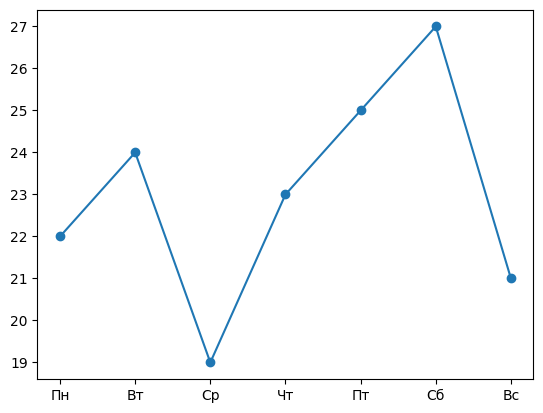

In [ ]:
import matplotlib.pyplot as plt

temperatures = [22, 24, 19, 23, 25, 27, 21]
days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

plt.plot(days, temperatures, marker='o')
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'A' : [1,2,3],
    'B' : [4,5,6],
    'C' : [7,8,9]
})

print(df.iloc[1]['B'])

5


In [ ]:
import numpy as np

matrix = np.array([[1,2,3],[3,5,6], [8,8,7]])
print(np.trace(matrix))


13


In [ ]:
x = 10
y = 5
def mystery(a,b):
  x=2
  return a+b

result = mystery(x,y)
print(result)

15


**Задача по Python: Округлите число до ближайшего, кратного пяти (в большую сторону)**

Как решать:

Сначала проверяем, не кратно ли уже данное число n пяти. Если это так, то возвращаем его без изменений.

В противном случае прибавляем к n разность между пятью и остатком от деления n на пять.

In [ ]:
def round_to_next5(n):
  if n % 5 == 0:
    return n
  return n+(5-n%5)

number = 7
rounded_number = round_to_next5(number)
print(rounded_number)

10


In [ ]:
import pandas as pd

data = {'Name': ['Anna', 'Bob', 'Cathy', 'Dave'],
        'Age': [23, 35, 42, 28],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}

df = pd.DataFrame(data)
result = df[df['Age'] > 30]['Name'].count()
print(result)

2


In [ ]:
print(5>10==False)
# Это цепочка сравнений. Выражение можно переписать как 5 > 10 and 10 == False

False


In [ ]:
def fibonacci_generator(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

# Использование генератора
fibo_sequence = list(fibonacci_generator(7))
print(fibo_sequence)

[0, 1, 1, 2, 3, 5, 8]


In [ ]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel()
x = torch.tensor([[2.0]], requires_grad=True)

# Прямой проход
output = model(x)

print(output.item())

-0.493172287940979


In [ ]:
nums = [2,3,4,5]
print(sum(nums,100))

114


In [ ]:
import numpy as np

A = np.array([2,4,6,8])
B = np.array([1,2,3,4])
C = A + B*2
print(C[2])

12


In [ ]:
print(bool(' ') + 4)
# когда True используется в арифметическом выражении, оно интерпретируется как число 1

5


In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, np.nan, 8, 10],
    'C': [10, 20, 30, 40, 50]
})

# Заполняем пропущенные значения
filled_data = data.fillna(method='ffill')

# Вычисляем сумму значений столбца 'B'
sum_b = filled_data['B'].sum()

print(sum_b)

33.0


/tmp/ipython-input-2466011494.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = data.fillna(method='ffill')


Этот код создает DataFrame, заполняет пропущенные значения (np.nan) методом ffill (forward fill), который использует последнее валидное значение для заполнения пропусков, а затем вычисляет сумму значений в столбце 'B'

In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

result = arr[::2] + 1

print(result)

[2 4 6]


In [ ]:
a = [1,2,3,4]
b = [1,2,5]
print(a<b)  # списки сравниваются поэлементно

True


In [ ]:
a = 1+2j
b = 1+2j
print(a is b)
# Оператор is в Python проверяет, указывают ли две переменные на один и тот же объект в памяти

False


In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
new_arr = np.where(arr < 4, arr, -1)  # np.where(condition, x, y) заменяет элементы в массиве arr
print(new_arr.sum())

4


In [ ]:
new_arr

array([ 1,  2,  3, -1, -1])

In [ ]:
import pandas as pd

data = {'A': ['one', 'one', 'two', 'three'],
        'B': ['X', 'Y', 'Y', 'X'],
        'C': [1, 2, 3, 4]}
df = pd.DataFrame(data)
pivot_df = df.pivot_table(index='A', columns='B', values='C', fill_value=0)
print(pivot_df)

B        X    Y
A              
one    1.0  2.0
three  4.0  0.0
two    0.0  3.0


In [ ]:
import math

print(math.floor(-1.8))
print(math.trunc(-1.8))  # math.trunc() просто отбрасывает всё, что стоит после точки
print(math.ceil(-1.8))

-2
-1
-1




Сколько параметров будет у свёрточного слоя?

```python
torch.nn.Conv2d(in_channels=2*C, out_channels=2*C, kernel_size=(3,3), padding=1, bias=False)
```

Чтобы найти общее количество обучаемых параметров, нужно использовать формулу:

$$\text{Total Params} = (\text{Размер ядра} \times \text{Входные каналы} + \text{Смещение}) \times \text{Выходные каналы}$$

**Разберем параметры:**

1.  **Входные каналы ($\text{in_channels}$):** $2 \times C$
2.  **Выходные каналы ($\text{out_channels}$):** $2 \times C$
3.  **Размер ядра ($\text{kernel_size}$):** $3 \times 3 = 9$
4.  **Смещение ($\text{bias}$):** `False`, то есть 0.

**Расчет весов (Weights):**

$$
\text{Weights Params} = \text{kernel_size} \times \text{in_channels} \times \text{out_channels}
$$

$$
\text{Weights Params} = 9 \times (2C) \times (2C) = 9 \times 4C^2 = 36C^2
$$

**Расчет смещения (Bias):**
$$\text{Bias Params} = \text{out_channels}$$
Так как `bias=False`, $\text{Bias Params} = 0$.

**Общее количество параметров:**
$$\text{Total Params} = 36C^2 + 0$$

**Ответ:** Количество параметров в свёрточном слое составляет **$36C^2$**.



In [ ]:
a = (10,20,30)
b = (40)
print(a+b)

TypeError: can only concatenate tuple (not "int") to tuple

In [ ]:
s = {}
t = {1,2,3,4}
print(type(s), type(t))

<class 'dict'> <class 'set'>


Для того чтобы найти градиент функции $f(u,v) = uv + 1$ в точке $(1, 2)$, нужно сначала вычислить частные производные функции по каждой переменной, а затем подставить координаты точки.

1. Определение градиента

Градиент функции $f(u,v)$ обозначается как $\nabla f$ и представляет собой вектор частных производных:

$$\nabla f(u,v) = \left\langle \frac{\partial f}{\partial u}, \frac{\partial f}{\partial v} \right\rangle$$

2. Вычисление частных производных

**Частная производная по $u$:**
Считаем $v$ константой.
$$\frac{\partial f}{\partial u} = \frac{\partial}{\partial u} (uv + 1) = v \cdot \frac{\partial}{\partial u}(u) + \frac{\partial}{\partial u}(1) = v \cdot 1 + 0 = v$$

**Частная производная по $v$:**
Считаем $u$ константой.
$$\frac{\partial f}{\partial v} = \frac{\partial}{\partial v} (uv + 1) = u \cdot \frac{\partial}{\partial v}(v) + \frac{\partial}{\partial v}(1) = u \cdot 1 + 0 = u$$

Таким образом, общий вид градиента:
$$\nabla f(u,v) = \langle v, u \rangle$$

3. Вычисление градиента в точке $(1, 2)$

Подставляем координаты точки $(u_0, v_0) = (1, 2)$ в найденное выражение для градиента:

$$\nabla f(1, 2) = \langle 2, 1 \rangle$$



**Ответ:** Градиент функции $f(u,v)=uv+1$ в точке $(1,2)$ равен вектору **$\langle 2, 1 \rangle$** (или $2\mathbf{i} + 1\mathbf{j}$).

Этот вектор показывает направление **наискорейшего роста** функции $f$ в данной точке .

Могу я помочь вам с вычислением градиента другой функции или объяснить, как используется градиент в машинном обучении?

In [ ]:
print(max(min(False, False), 1, True))

1


In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
new_row = pd.Series({'A': 7, 'B': 8, 'C': 9})

# Конкатенация. new_row.to_frame().T создает DataFrame из одной строки.
# ignore_index=True перенумеровывает индексы: 0, 1, 2, 3.
df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

# loc[3, 'C'] обращается к 4-й строке (индекс 3) и столбцу 'C'.
print(df.loc[3, 'C'])

9.0


In [ ]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

# c = [True, True, False, False, False]
c = a < b

# d = [False, False, True, True, True]
d = a > 2

# result = c * d - булевы массивы умножаются поэлементно, True=1, False=0
# result = [0*0, 1*0, 0*1, 0*1, 0*1]
result = c * d
print(result)

[False False False False False]


In [ ]:
x = 10
def foo():
  x += 1
  print(x)

foo()


UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

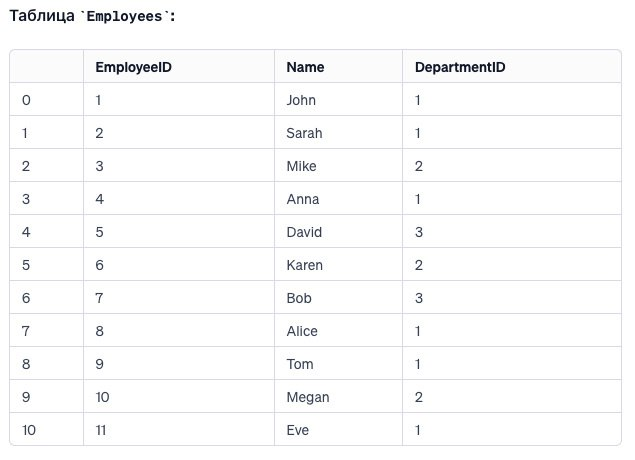

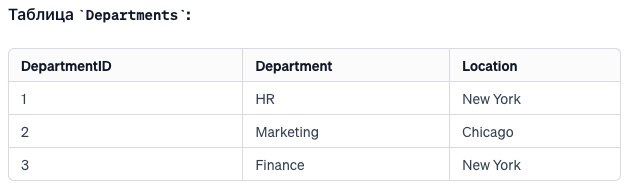



```sql
SELECT E.DepartmentID, COUNT(E.EmployeeID)
FROM Employees E
JOIN Departments D ON E.DepartmentID = D.DepartmentID
WHERE D.Location = 'New York'
GROUP BY E.DepartmentID
HAVING COUNT(E.EmployeeID) > 5;
```

 Сколько строк будет в результате его выполнения?

- Ответ: 1

In [ ]:
import numpy as np

# Определение двух матриц 2x2
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 1. result1 = A @ B (Матричное умножение)
result1 = A @ B

# 2. result2 = A * B (Поэлементное умножение)
result2 = A * B

# Вывод результатов
print("Результат 1:", result1)
print("Результат 2:", result2)


Результат 1: [[19 22]
 [43 50]]
Результат 2: [[ 5 12]
 [21 32]]


In [ ]:
def mystery_func(lst):
    return [i for i in lst if i % 2]

result = mystery_func([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(result)

[1, 3, 5, 7, 9]


`if i % 2:` Это условие — ключевой момент. Оператор `% 2` вычисляет остаток от деления числа i на 2.

- Если число нечетное (например, 5), остаток от деления на 2 будет 1. В Python, число 1 интерпретируется как `True` (Истина), поэтому нечетное число проходит проверку.

- Если число четное (например, 6), остаток от деления на 2 будет 0. В Python, число 0 интерпретируется как `False` (Ложь), поэтому четное число не проходит проверку.

In [ ]:
import pandas as pd
import numpy as np

# Создаем DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Score1': [9, 5, np.nan, 8, 7],
    'Score2': [7, np.nan, 8, 6, 5]
})
# Преобразуем данные
df['Average'] = df[['Score1', 'Score2']].mean(axis=1)
top_student = df.sort_values(by='Average', ascending=False).iloc[0]['Name']

print(top_student)

Alice


In [ ]:
def my_str():
    message = "Python "
    new_msg = message + "is " + message
    new_msg.replace(message, "Great ")
    return new_msg

print(my_str())
# Метод .replace() не изменяет строку new_msg на месте; он возвращает новую строку с произведенными заменами.

Python is Python 


In [ ]:
import numpy as np

a = np.arange(10, 50, 10)
b = np.flip(a)  # Функция np.flip(a) меняет порядок элементов в массиве a на обратный
c = b[1]

print(c)

30


In [ ]:
import pandas as pd

data = {
    'Company': ['CompA', 'CompB', 'CompA', 'CompB', 'CompA', 'CompB'],
    'Year': [2020, 2020, 2021, 2021, 2022, 2022],
    'Revenue': [1000, 1500, 2000, 2500, 3000, 3500]
}

df = pd.DataFrame(data)

result = df.groupby('Company').apply(lambda x: x.sort_values('Year', ascending=False).head(1)).sum()['Revenue']

print(result)

6500


/tmp/ipython-input-1003654411.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('Company').apply(lambda x: x.sort_values('Year', ascending=False).head(1)).sum()['Revenue']


In [ ]:
def enigma(x):
  y = 2
  return x * y
a = '7'
b = enigma(a)
b

'77'

In [ ]:
import torch
import numpy as np

a = np.ones(5)  # По умолчанию, numpy создает массивы с типом данных с плавающей запятой (float64)
b = torch.from_numpy(a) # При преобразовании из numpy в torch, тип данных массива numpy автоматически сопоставляется с ближайшим типом тензора PyTorch.
print(b.dtype)

torch.float64


In [ ]:
b = torch.tensor([1, 1, 1, 5, 1], dtype=torch.float)

print(b.requires_grad)

False


По умолчанию для новых тензоров в PyTorch параметр `requires_grad ` установлен в `False`. Он указывает, нужно ли вычислять градиенты для тензора во время операций обратного распространения ошибки. Чтобы добиться этого, следует явно установить requires_grad=True при создании тензора.

In [ ]:
age = 5
if True:
  age = 6
print(age)

6


In [ ]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

c = a[::2] + b[-2::-2]

print(c)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
a = 5 and 10  # and возвращает первый операнд, если он ложен, иначе возвращает второй операнд
b = 5 or 10   # 5 or возвращает первый операнд, если он истинен, иначе возвращает второй операнд
c = a + b
print(c * 2)

30


In [ ]:
import pandas as pd

df_A = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'value_A': ['A1', 'A2', 'A3', 'A4']
})

df_B = pd.DataFrame({
    'id': [3, 4, 5, 6],
    'value_B': ['B3', 'B4', 'B5', 'B6']
})

df_outer = pd.merge(df_A, df_B, on='id', how='outer')
print(df_outer)

   id value_A value_B
0   1      A1     NaN
1   2      A2     NaN
2   3      A3      B3
3   4      A4      B4
4   5     NaN      B5
5   6     NaN      B6


In [ ]:
x = '2\\t4'
print(x)

2\t4


В строковых литералах Python обратный слеш \ используется для экранирования специальных символов, таких как \n для новой строки или \t для табуляции. В данном случае  двойной обратный слеш \\ интерпретируется как один обратный слеш, а символ t после него остаётся просто буквой. Вывод будет — '2\t4'.

In [ ]:
import numpy as np

A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])

x = np.linalg.solve(A, b)
print(x)

[2. 3.]


Функция `np.linalg.solve(A, b)` решает  систему уравнений, которая выглядит так:

3x1+x2=9

x1+2x2=8

Её решением будет [2. 3.]

In [ ]:
import numpy as np

print(np.array(0) / np.array(0))
print(np.array(0) // np.array(0))

nan
0


/tmp/ipython-input-795582189.py:3: RuntimeWarning: invalid value encountered in divide
  print(np.array(0) / np.array(0))
/tmp/ipython-input-795582189.py:4: RuntimeWarning: divide by zero encountered in floor_divide
  print(np.array(0) // np.array(0))


In [ ]:
print(4 + 3 % 2 * 2)

6


In [ ]:
import numpy as np
print(np.nan - np.nan)

nan


In [ ]:
import numpy as np
print(np.nan == np.nan)

False


In [ ]:
phrase = []
phrase.append('Добрый день')
print(phrase(0))

TypeError: 'list' object is not callable

In [ ]:
print(phrase[0])

Добрый день


In [ ]:
# 03/24